### Imports and Definitions

In [1]:
from glob import glob
from matplotlib import rcParams
from matplotlib.lines import Line2D
from os import makedirs
from seaborn import pointplot,set_context,set_style,violinplot
import matplotlib.pyplot as plt
FIGDIR = '../figs'; makedirs(FIGDIR, exist_ok=True)
set_context("paper", rc={"font.size":12,"axes.titlesize":16,"axes.labelsize":14,"legend.fontsize":10,"xtick.labelsize":10,"ytick.labelsize":10})
set_style("ticks")
rcParams['font.family'] = 'serif'
linestyle = {
    'mafft': '--',
    'viralmsa': '-',
}
color = {
    'mafft': 'red',
    'viralmsa': 'blue',
}
translate = {
    'mafft': 'MAFFT',
    'viralmsa': 'ViralMSA',
}

### Execution Time vs. Number of Sequences

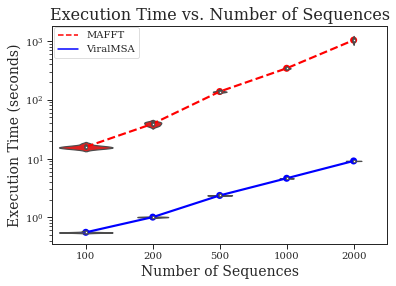

In [2]:
fig = plt.figure()
for m in ['mafft', 'viralmsa']:
    x = list(); y = list()
    for n in [100,200,500,1000,2000]:
        for fn in glob('../data/HIV1/%d/%d.*.%s.time.txt' % (n,n,m)):
            x.append(n); y.append(float(open(fn).read().split('user')[0]))
    pointplot(x=x, y=y, color=color[m], linestyles=linestyle[m])
    violinplot(x=x, y=y, color=color[m], linestyles=linestyle[m])
plt.yscale('log')
plt.title("Execution Time vs. Number of Sequences")
plt.xlabel("Number of Sequences")
plt.ylabel("Execution Time (seconds)")
handles = [Line2D([0],[0],color=color[m],label=translate[m],linestyle=linestyle[m],linewidth=1.5) for m in ['mafft','viralmsa']]
legend = plt.legend(handles=handles,bbox_to_anchor=(0.005, 0.995), loc='upper left', borderaxespad=0., frameon=True)
fig.savefig('%s/runtime.pdf'%FIGDIR, format='pdf', bbox_inches='tight')

### Spearman and Pearson Correlation of Mantel Test of TN93 Distances

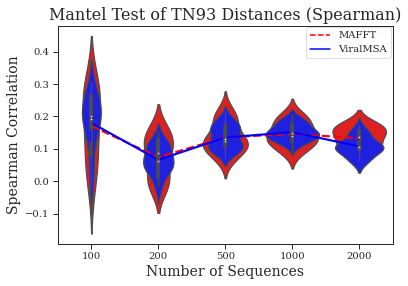

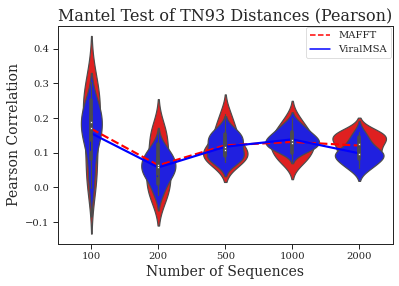

In [3]:
for c in ['spearman','pearson']:
    fig = plt.figure()
    for m in ['mafft', 'viralmsa']:
        x = list(); y = list()
        for n in [100,200,500,1000,2000]:
            for fn in glob('../data/HIV1/%d/%d.*.%s.tn93.mantel.%s.txt' % (n,n,m,c)):
                x.append(n); y.append(float(open(fn).read().split(':')[1]))
        pointplot(x=x, y=y, color=color[m], linestyles=linestyle[m])
        violinplot(x=x, y=y, color=color[m], linestyles=linestyle[m])
    plt.title("Mantel Test of TN93 Distances (%s)" % c.capitalize())
    plt.xlabel("Number of Sequences")
    plt.ylabel("%s Correlation" % c.capitalize())
    handles = [Line2D([0],[0],color=color[m],label=translate[m],linestyle=linestyle[m],linewidth=1.5) for m in ['mafft','viralmsa']]
    legend = plt.legend(handles=handles,bbox_to_anchor=(0.995, 0.995), loc='upper right', borderaxespad=0., frameon=True)
    fig.savefig('%s/mantel.%s.pdf'%(FIGDIR,c), format='pdf', bbox_inches='tight')